# Setup

In [4]:
import pandas as pd
import os

import sys
sys.path.append(os.path.join('..','src'))

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

from feature_engineering import HotelBookingFeatures
from data_preprocessing import DataPreprocessor
from utils import DataLoader, TrainTestSplitter

from models import Classification_Model

import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [5]:
data_folder = os.path.join('..','data')
file_to_open = os.path.join(data_folder,"hotel_bookings.csv")
# load the data using the DataLoader class
data_loader = DataLoader()
hotel_bookings = data_loader.load_data(file_to_open)

# Preprocess Data and Add Features

In [6]:
preprocess  = DataPreprocessor()
hotel_bookings = preprocess.fit_transform(hotel_bookings)
hotel_booking_features = HotelBookingFeatures()
hotel_bookings = hotel_booking_features.fit_transform(hotel_bookings)

Converting date columns to datetime...


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<00:00, 61.13it/s]


Date columns converted to datetime.

Dropping rows with missing values...


100%|██████████| 1/1 [00:00<00:00, 14.70it/s]


5 rows dropped from 150000.

Dropping duplicate rows...


100%|██████████| 1/1 [00:00<00:00, 11.67it/s]


33 rows dropped from 149995.

Dropping rows with negative adr...


100%|██████████| 1/1 [00:00<00:00, 44.32it/s]


67 rows dropped from 149962.

Encoding categorical variables...


100%|██████████| 10/10 [00:00<00:00, 56.36it/s]


Categorical variables encoded.





# Model Training

## Test-Train Split

In [7]:
hotel_bookings.columns

Index(['hotel_name', 'season', 'arrival_date', 'departure_date', 'guest_type',
       'customer_type', 'company', 'adr', 'num_guests', 'adults', 'children',
       'babies', 'meal', 'source_country', 'market_segment',
       'distribution_channel', 'assigned_room_type', 'is_canceled',
       'booking_date', 'is_weekend_stay', 'num_days_stayed',
       'booking_lead_time', 'arrival_dayofweek', 'arrival_month',
       'arrival_year', 'arrival_weekofyear', 'arrival_date_month'],
      dtype='object')

In [8]:
train_test_splitter = TrainTestSplitter()
X_train_resort, X_test_resort, y_train_resort, y_test_resort = train_test_splitter.split(hotel_bookings,codes=[0,2])
X_train_hotel, X_test_hotel, y_train_hotel, y_test_hotel = train_test_splitter.split(hotel_bookings,codes=[1,3,4])

## Models Training

#### Hotels:
-   Braga City Hotel
-   Lisbon City Hotel
-   Porto City Hotel

In [11]:
numeric_columns = ['adr','adults', 'children', 'babies','num_days_stayed', 
                                'booking_lead_time', 'arrival_dayofweek', 'arrival_month']
# create a model instance and train the classifiers
hotel_model = Classification_Model(X_train_hotel, y_train_hotel, X_test_hotel, y_test_hotel, cols_to_scale=numeric_columns)
hotel_model.train_decision_tree()
hotel_model.train_random_forest()
hotel_model.train_xgboost()
hotel_model.train_logistic_regression()

Training decision tree classifier...


100%|██████████| 1/1 [00:00<00:00,  2.27it/s]


Decision tree classifier trained.

Training random forest classifier...


100%|██████████| 1/1 [00:07<00:00,  7.78s/it]


Random forest classifier trained.

Training XGBoost classifier...


100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


XGBoost classifier trained.

Training logistic regression classifier...


100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

Logistic regression classifier trained.



### Evaluation

Evaluating classifiers with cross validation...


100%|██████████| 4/4 [00:47<00:00, 11.75s/it]


| Classifier          |   Accuracy |   Precision |   Recall |   F1 Score | Classification Report                                 |   CV Mean |     CV Std |
|---------------------+------------+-------------+----------+------------+-------------------------------------------------------+-----------+------------|
| Decision Tree       |   0.667319 |    0.670278 | 0.667319 |   0.668654 | precision    recall  f1-score   support               |  0.655578 | 0.00390013 |
|                     |            |             |          |            |                                                       |           |            |
|                     |            |             |          |            |            0       0.74      0.73      0.73     12646 |           |            |
|                     |            |             |          |            |            1       0.54      0.57      0.55      7292 |           |            |
|                     |            |             |          |   

100%|██████████| 3/3 [00:00<00:00, 140.96it/s]

Feature importance for Decision Tree:
                 feature          model  importance
0                    adr  Decision Tree    0.222484
18     booking_lead_time  Decision Tree    0.217534
48       num_days_stayed  Decision Tree    0.089080
9          arrival_month  Decision Tree    0.086593
6      arrival_dayofweek  Decision Tree    0.068317
42        market_segment  Decision Tree    0.067308
12    assigned_room_type  Decision Tree    0.056851
36            hotel_name  Decision Tree    0.035776
27         customer_type  Decision Tree    0.028801
45                  meal  Decision Tree    0.024865
3                 adults  Decision Tree    0.024034
33            guest_type  Decision Tree    0.022943
30  distribution_channel  Decision Tree    0.017403
39       is_weekend_stay  Decision Tree    0.015578
24               company  Decision Tree    0.011401
21              children  Decision Tree    0.009941
15                babies  Decision Tree    0.001090


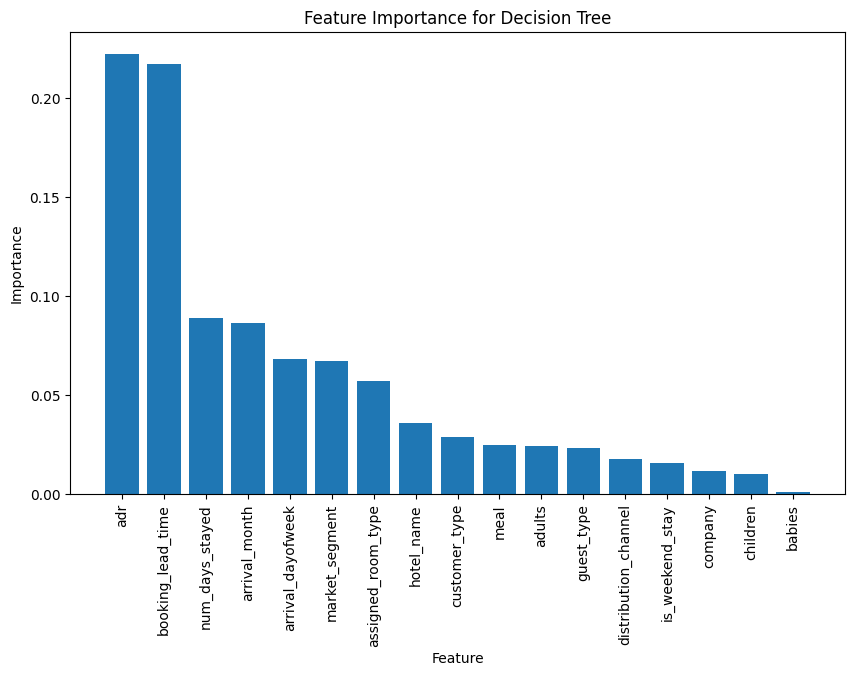

Feature importance for Random Forest:
                 feature          model  importance
19     booking_lead_time  Random Forest    0.217677
1                    adr  Random Forest    0.202489
49       num_days_stayed  Random Forest    0.110989
10         arrival_month  Random Forest    0.096364
7      arrival_dayofweek  Random Forest    0.069946
43        market_segment  Random Forest    0.056434
37            hotel_name  Random Forest    0.041023
13    assigned_room_type  Random Forest    0.038284
28         customer_type  Random Forest    0.035002
46                  meal  Random Forest    0.026754
34            guest_type  Random Forest    0.025505
4                 adults  Random Forest    0.021586
40       is_weekend_stay  Random Forest    0.019102
31  distribution_channel  Random Forest    0.015786
25               company  Random Forest    0.011068
22              children  Random Forest    0.009989
16                babies  Random Forest    0.002003


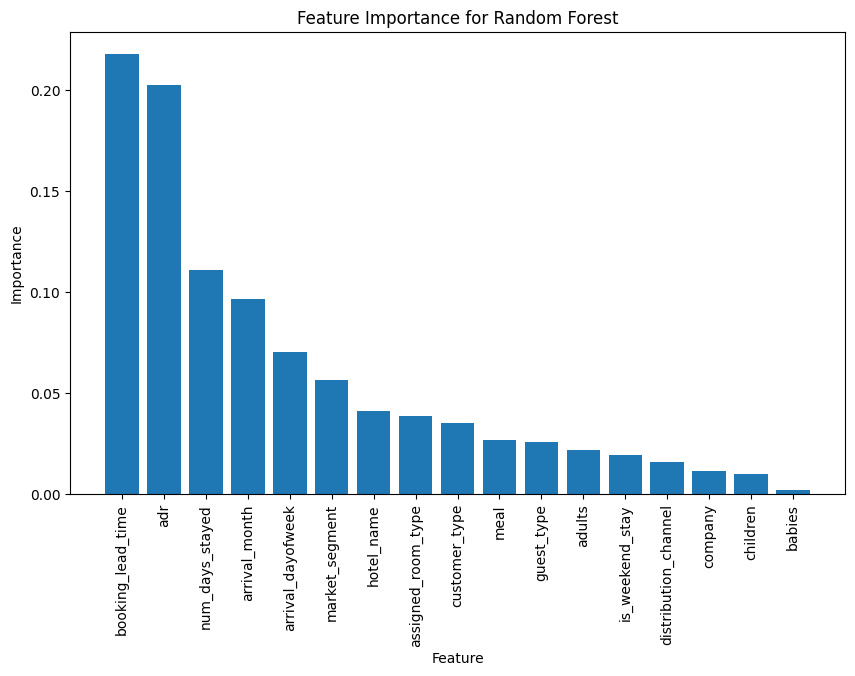

Feature importance for XGBoost:
                 feature    model  importance
29         customer_type  XGBoost    0.175659
44        market_segment  XGBoost    0.148098
14    assigned_room_type  XGBoost    0.116317
32  distribution_channel  XGBoost    0.092559
50       num_days_stayed  XGBoost    0.076068
20     booking_lead_time  XGBoost    0.069562
47                  meal  XGBoost    0.047929
2                    adr  XGBoost    0.035853
11         arrival_month  XGBoost    0.032701
35            guest_type  XGBoost    0.031723
5                 adults  XGBoost    0.030826
8      arrival_dayofweek  XGBoost    0.029718
23              children  XGBoost    0.026646
26               company  XGBoost    0.026136
17                babies  XGBoost    0.024095
41       is_weekend_stay  XGBoost    0.019784
38            hotel_name  XGBoost    0.016326


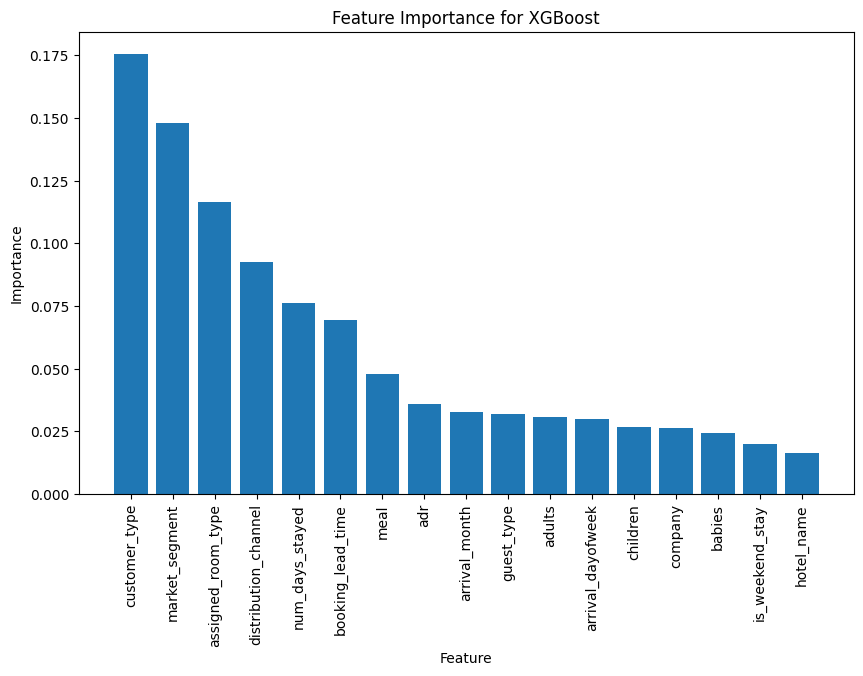

Feature importance printed.

Creating confusion matrix...


  0%|          | 0/4 [00:00<?, ?it/s]

Confusion matrix for Decision Tree:
[[9182 3464]
 [3169 4123]]


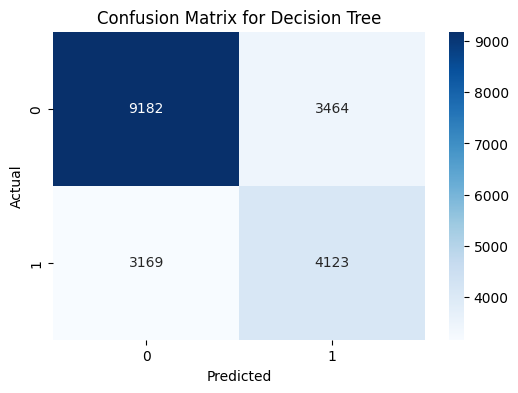

Confusion matrix for Random Forest:
[[11877   769]
 [ 4222  3070]]


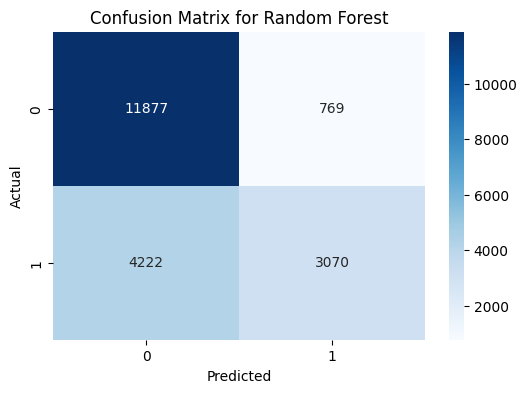

 50%|█████     | 2/4 [00:00<00:00,  3.95it/s]

Confusion matrix for Logistic Regression:
[[11777   869]
 [ 5818  1474]]


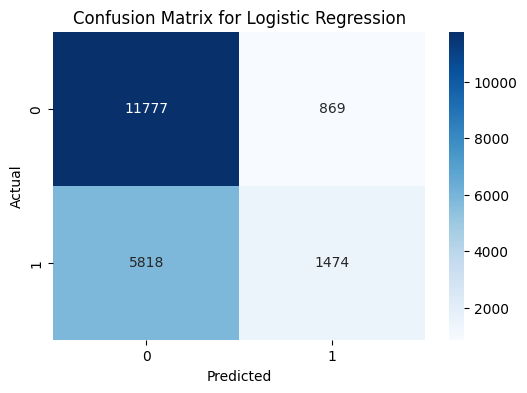

 75%|███████▌  | 3/4 [00:00<00:00,  4.08it/s]

Confusion matrix for XGBoost:
[[11838   808]
 [ 4613  2679]]


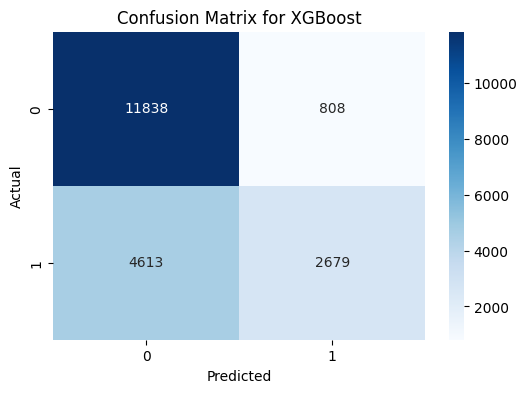

100%|██████████| 4/4 [00:00<00:00,  4.63it/s]

Confusion matrices created.



In [12]:
# evaluate the classifiers
hotel_model.evaluate()
hotel_model.feature_importance(plot=True)
hotel_model.confusion_matrix(plot=True)

## Resorts:
-   Algarve Retreat 
-   Duro Valley Resort

Plotting feature importance...


100%|██████████| 3/3 [00:00<00:00, 78.70it/s]

Feature importance for Decision Tree:
                 feature          model  importance
0                    adr  Decision Tree    0.243680
18     booking_lead_time  Decision Tree    0.239870
48       num_days_stayed  Decision Tree    0.098858
6      arrival_dayofweek  Decision Tree    0.084135
9          arrival_month  Decision Tree    0.082547
12    assigned_room_type  Decision Tree    0.038964
45                  meal  Decision Tree    0.027683
33            guest_type  Decision Tree    0.027543
27         customer_type  Decision Tree    0.027020
36            hotel_name  Decision Tree    0.023577
42        market_segment  Decision Tree    0.023171
3                 adults  Decision Tree    0.018595
39       is_weekend_stay  Decision Tree    0.018595
30  distribution_channel  Decision Tree    0.018500
24               company  Decision Tree    0.012423
21              children  Decision Tree    0.011424
15                babies  Decision Tree    0.003414


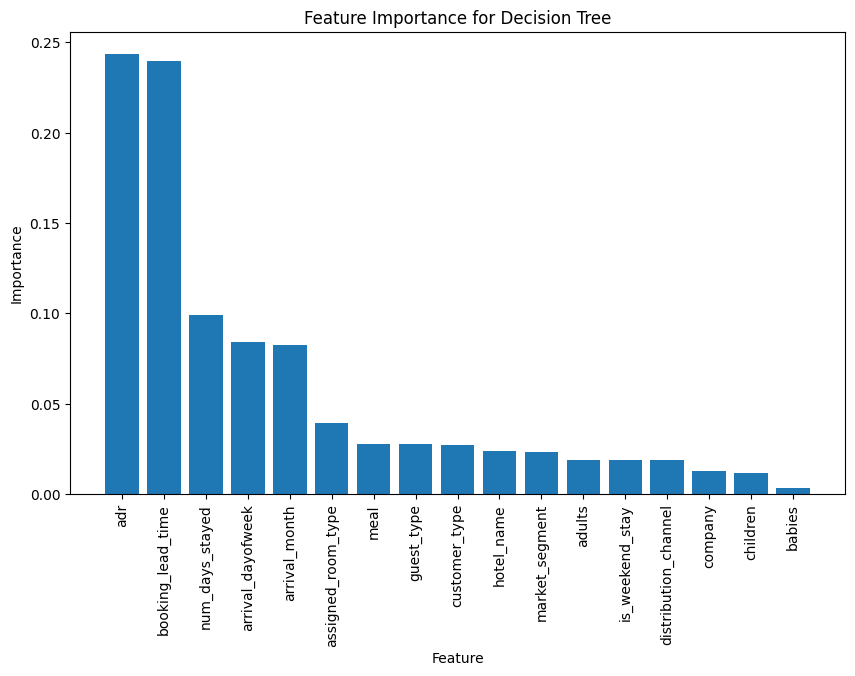

Feature importance for Random Forest:
                 feature          model  importance
19     booking_lead_time  Random Forest    0.211706
1                    adr  Random Forest    0.206004
49       num_days_stayed  Random Forest    0.118003
10         arrival_month  Random Forest    0.094435
7      arrival_dayofweek  Random Forest    0.076244
13    assigned_room_type  Random Forest    0.043796
43        market_segment  Random Forest    0.039962
46                  meal  Random Forest    0.032579
37            hotel_name  Random Forest    0.028697
34            guest_type  Random Forest    0.028414
28         customer_type  Random Forest    0.027292
4                 adults  Random Forest    0.021424
31  distribution_channel  Random Forest    0.020185
40       is_weekend_stay  Random Forest    0.019887
25               company  Random Forest    0.014489
22              children  Random Forest    0.013802
16                babies  Random Forest    0.003082


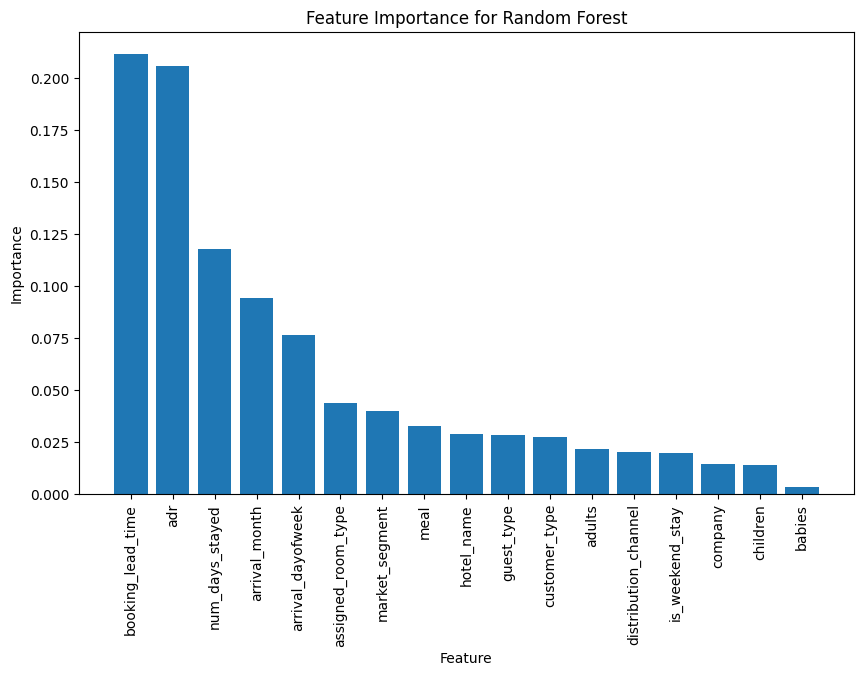

Feature importance for XGBoost:
                 feature    model  importance
29         customer_type  XGBoost    0.128461
20     booking_lead_time  XGBoost    0.096897
14    assigned_room_type  XGBoost    0.080405
44        market_segment  XGBoost    0.080388
23              children  XGBoost    0.072959
50       num_days_stayed  XGBoost    0.068103
47                  meal  XGBoost    0.065672
32  distribution_channel  XGBoost    0.059212
35            guest_type  XGBoost    0.051432
2                    adr  XGBoost    0.045693
11         arrival_month  XGBoost    0.041671
26               company  XGBoost    0.040167
41       is_weekend_stay  XGBoost    0.039688
8      arrival_dayofweek  XGBoost    0.036744
5                 adults  XGBoost    0.033839
38            hotel_name  XGBoost    0.030810
17                babies  XGBoost    0.027860


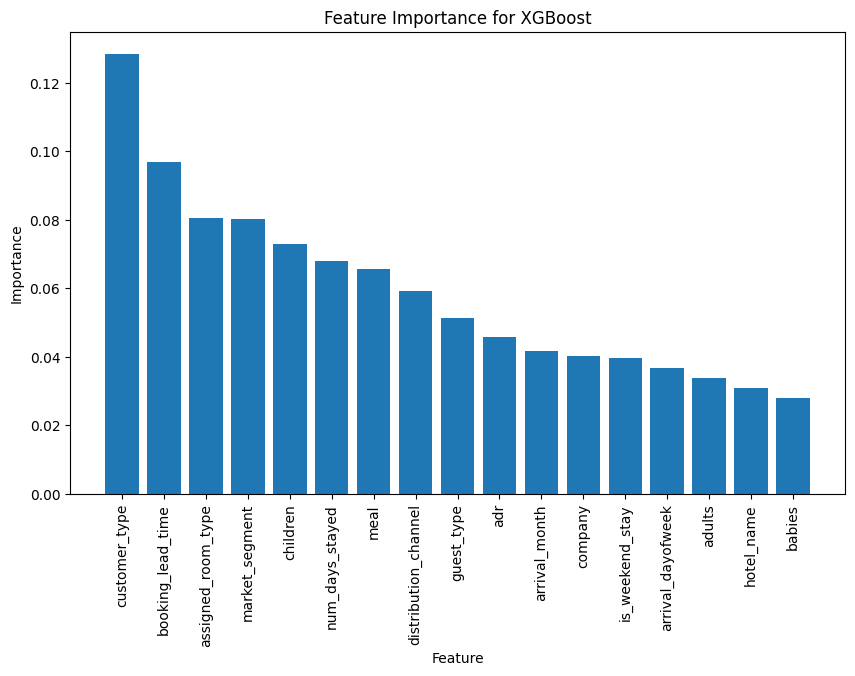

Feature importance printed.

Creating confusion matrix...


  0%|          | 0/4 [00:00<?, ?it/s]

Confusion matrix for Decision Tree:
[[5349 1796]
 [1574 1323]]


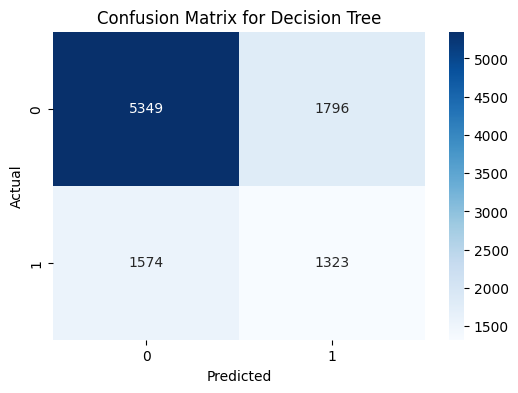

 25%|██▌       | 1/4 [00:00<00:00,  9.30it/s]

Confusion matrix for Random Forest:
[[6791  354]
 [2066  831]]


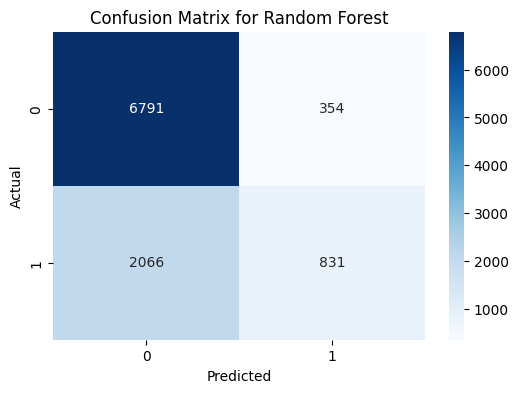

 50%|█████     | 2/4 [00:00<00:00,  4.08it/s]

Confusion matrix for Logistic Regression:
[[7107   38]
 [2865   32]]


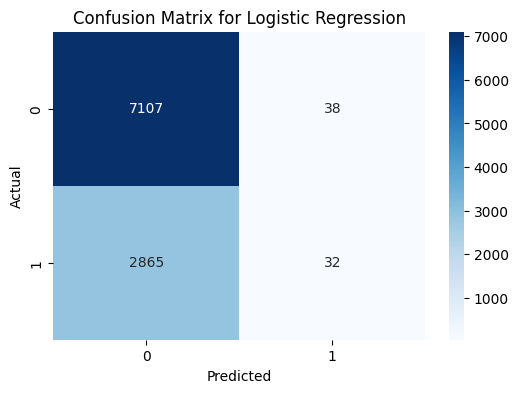

 75%|███████▌  | 3/4 [00:00<00:00,  3.76it/s]

Confusion matrix for XGBoost:
[[6746  399]
 [2212  685]]


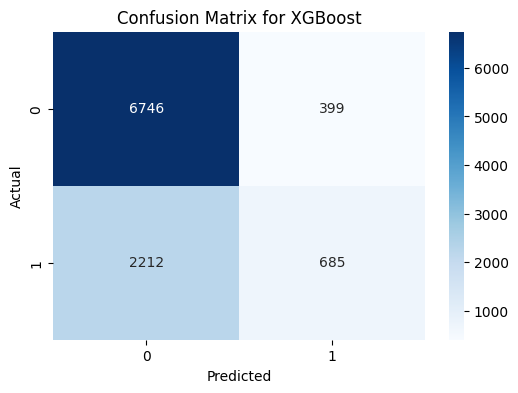

100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

Confusion matrices created.



In [14]:
resort_model = Classification_Model(X_train_resort, y_train_resort, X_test_resort, y_test_resort, cols_to_scale=numeric_columns)
resort_model.train_decision_tree()
resort_model.train_random_forest()
resort_model.train_xgboost()
resort_model.train_logistic_regression()

# evaluate the classifiers
resort_model.evaluate()
resort_model.feature_importance(plot=True)
resort_model.confusion_matrix(plot=True)